In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

def f(x, y, z, regla):
    return regla & (1 << (x << 2 | y << 1 | z))


def ac1(regla=135, E0="azar", alto=100, ancho=100):
    fig = plt.figure(figsize=(alto/10,ancho/10))
    E = np.zeros((alto, ancho), dtype=np.bool_)
    if E0 == "central":
        E[0, int(ancho / 2)] = 1  # 1 central
    elif E0[0] in ['0','1']:
        ancho = len(E0)
        E = np.zeros((alto, ancho), dtype=np.bool_)
        for r in range(256):
            E[0, :] = np.array(list(E0))
    else:
        E[0, :] = np.round(np.random.rand(1, ancho))  # renglon aleatorio
    for i in range(1, alto):
        for j in range(1, ancho - 1):
            E[i, j] = f(E[i - 1, j - 1], E[i - 1, j], E[i - 1, j + 1], regla)
            E[i, 0] = f(E[i - 1, ancho - 1], E[i - 1, 0], E[i - 1, 1], regla) #ahorra un seg separar estos 2 casos
            E[i, ancho - 1] = f(E[i - 1, ancho - 2], E[i - 1, ancho - 1], E[i - 1, 0], regla)
    plt.imshow(E, cmap=cm.Blues)
    plt.show()

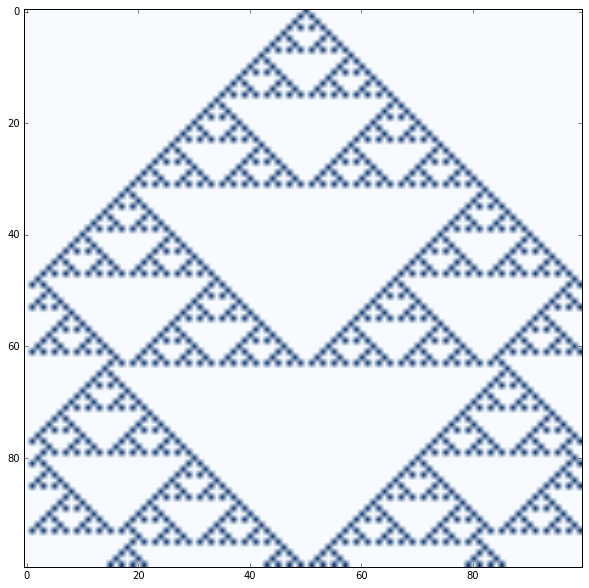

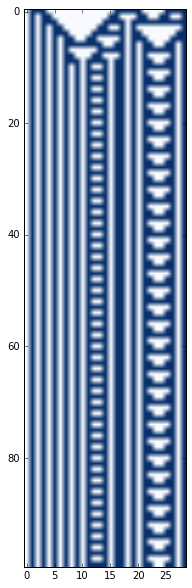

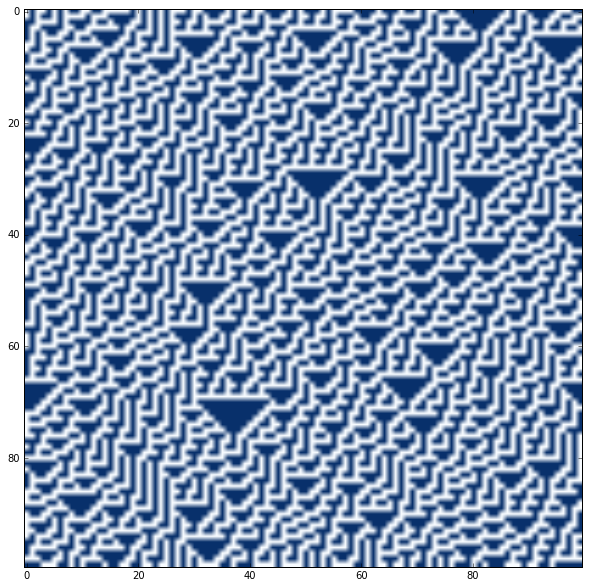

In [6]:
#probar reglas 30,54,60,62,90,94,102,110,122,126,150,158,182,188,190,220,222,250
ac1(90, "central")
ac1(94, "01110000000000001111100001111")
ac1() # regla 135, E0 azar, 100x100